### Data Loading

#### Data Plotting

In [ ]:
import sys
import time 
import os
import cv2
import datetime
from PIL import Image
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
% matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Class_Imbalance/FER2013/icml_face_data.csv')

Dict = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
for i in range(len(data['emotion'])):
  data['emotion'][i] = Dict[data['emotion'][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
groups = [g for _, g in data.groupby(' Usage')]
train = groups[2]
val = groups[1]
test = groups[0]

train = train.drop(labels=[' Usage'], axis=1)
val = val.drop(labels=[' Usage'], axis=1)
test = test.drop(labels=[' Usage'], axis=1)

Y_train = train["emotion"]
Y_val = val["emotion"]
Y_test = test["emotion"]
#'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'#

X_train = train[" pixels"]
X_val = val[" pixels"]
X_test = test[" pixels"]

In [ ]:
np.unique(data['emotion'])
# data['emotion']

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


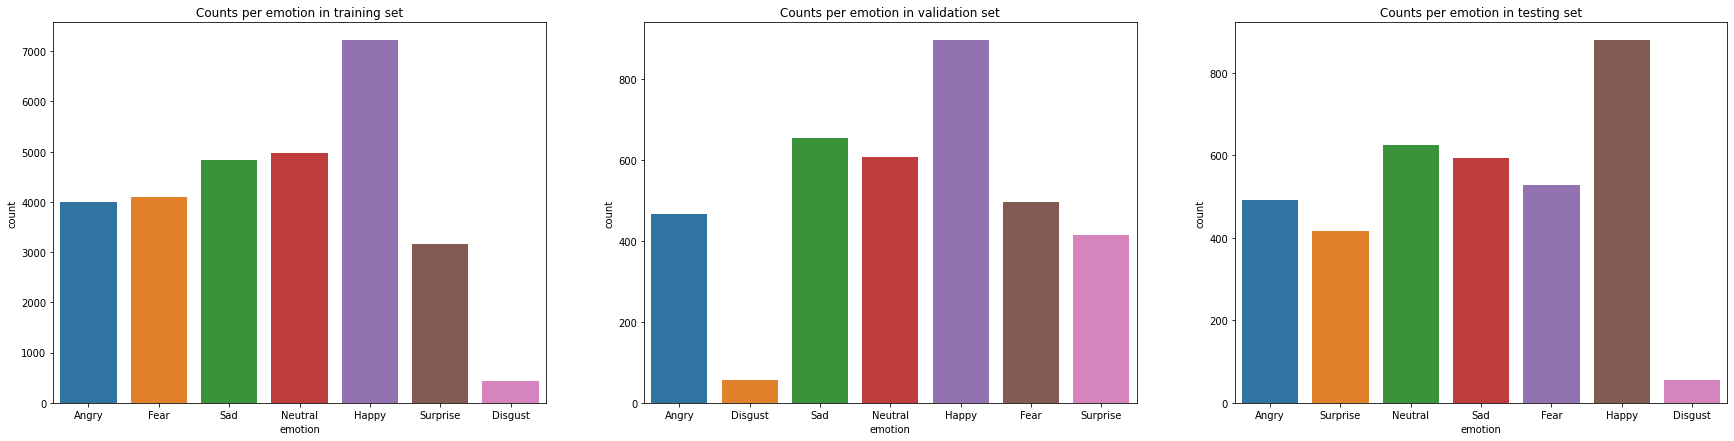

In [ ]:
# import seaborn as sns
plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
ax = sns.countplot(Y_train)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in training set")

plt.subplot(1,3,2)
ax = sns.countplot(Y_val)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in validation set")

plt.subplot(1,3,3)
ax = sns.countplot(Y_test)
ax.set(ylabel="count", xlabel="emotion")
plt.title("Counts per emotion in testing set")
plt.savefig("Dataset Details.pdf")

#### Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Class_Imbalance/FER2013/icml_face_data.csv')

In [ ]:
print(data.keys())
print(data[data.keys()[1]].unique())
print(data[' Usage'].unique())

Index(['emotion', ' Usage', ' pixels'], dtype='object')
['Training' 'PublicTest' 'PrivateTest']
['Training' 'PublicTest' 'PrivateTest']


In [ ]:
data_train = data.loc[data[' Usage']=='Training']
public_test = data.loc[data[' Usage']=='PublicTest']
private_test = data.loc[data[' Usage']=='PrivateTest']

In [ ]:
data_train.head()


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
public_test.head()


,emotion,Usage,pixels
28709,0,PublicTest,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,PublicTest,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,PublicTest,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,PublicTest,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,PublicTest,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [ ]:
private_test.head()


,emotion,Usage,pixels
32298,0,PrivateTest,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
32299,5,PrivateTest,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
32300,6,PrivateTest,232 240 241 239 237 235 246 117 24 24 22 13 12...
32301,4,PrivateTest,200 197 149 139 156 89 111 58 62 95 113 117 11...
32302,2,PrivateTest,40 28 33 56 45 33 31 78 152 194 200 186 196 20...


In [ ]:
k = data_train.iloc[2,2]
len(k.split())

2304

In [ ]:
data_train.describe()


,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


### Data Preprocessing
Transforming csv to understandable image data and labels

In [ ]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)
public_test = shuffle(public_test)
private_test = shuffle(private_test)

In [ ]:
train = np.array(data_train.iloc[:,2])
validation = np.array(private_test.iloc[:,2])
test = np.array(public_test.iloc[:,2])
print(train.shape, test.shape, validation.shape)

(28709,) (3589,) (3589,)


In [ ]:
train = train.reshape(28709,1)
test = test.reshape(3589,1)
validation = validation.reshape(3589,1)

In [ ]:
def data_augmentation(img):
  img = cv2.flip(img.reshape(48,48), 1)
  return np.array(img.reshape(48,48,1)).astype(np.float32)

In [ ]:
# print(data_train.iloc[:,2])

In [ ]:
import cv2
X_train_flip = list()

def reform_data(img_str):
  t1 = img_str[0].split()
  t2 = np.array(t1).astype(np.float32)
  t3 = t2.reshape(48, 48)
  t4 = cv2.cvtColor(t3, cv2.COLOR_GRAY2BGR)
  return t4


def reform_data_aug(img_str):
  t1 = img_str[0].split()
  t2 = np.array(t1).astype(np.float32)
  t3 = t2.reshape(48,48)
  t_1 = data_augmentation(t3)
  t4 = cv2.cvtColor(t3, cv2.COLOR_GRAY2BGR)
  X_train_flip.append(cv2.cvtColor(t_1, cv2.COLOR_GRAY2BGR))
  return t4

# X_train_1 = np.apply_along_axis(reform_data_aug, 1, train)
# X_train = np.array(list(X_train_1) + X_train_flip)
X_train = np.apply_along_axis(reform_data, 1, train)
X_test = np.apply_along_axis(reform_data, 1, test)
X_valid = np.apply_along_axis(reform_data, 1, validation)

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(28709, 48, 48, 3)
(3589, 48, 48, 3)
(3589, 48, 48, 3)


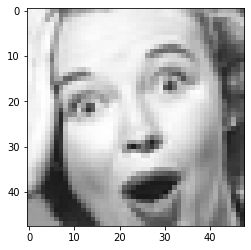

In [ ]:
for i in range(50,51):
  plt.imshow(X_train[i])

In [ ]:
Y_train = data_train['emotion']
Y_test = public_test['emotion']
Y_validation = private_test['emotion']
print(Y_train.shape, Y_test.shape, Y_validation.shape)


(28709,) (3589,) (3589,)


In [ ]:
def onehot(Y, C):
  Y = np.eye(C)[Y].T
  return Y

In [ ]:
data['emotion'].unique()


array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
Y_test = onehot(Y_test, 7).T
Y_train = onehot(Y_train, 7).T
Y_valid = onehot(Y_validation, 7).T
Y_train.shape

(28709, 7)

In [ ]:
Y_train = np.array(list(Y_train) + list(Y_train))
Y_train.shape

(57418,)

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=2)


In [ ]:
# del data
# del data_train
# del public_test
# del private_test
# del Y_validation
# del X_train_1
# del X_train_flip
# del train
# del validation
# del test

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, Conv3D, MaxPooling2D, BatchNormalization, AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, Adamax
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.regularizers import l2

In [ ]:
num_features = 64
num_labels = 7
batch_size = 128
epochs = 100
input_shape = (48, 48, 3)

In [ ]:
def Model1(input_shape=(48,48,3)):
  model = Sequential()
  model.add(Conv2D(1, kernel_size=(1, 1), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(2*2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*num_features, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_labels, activation='softmax'))
  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       7

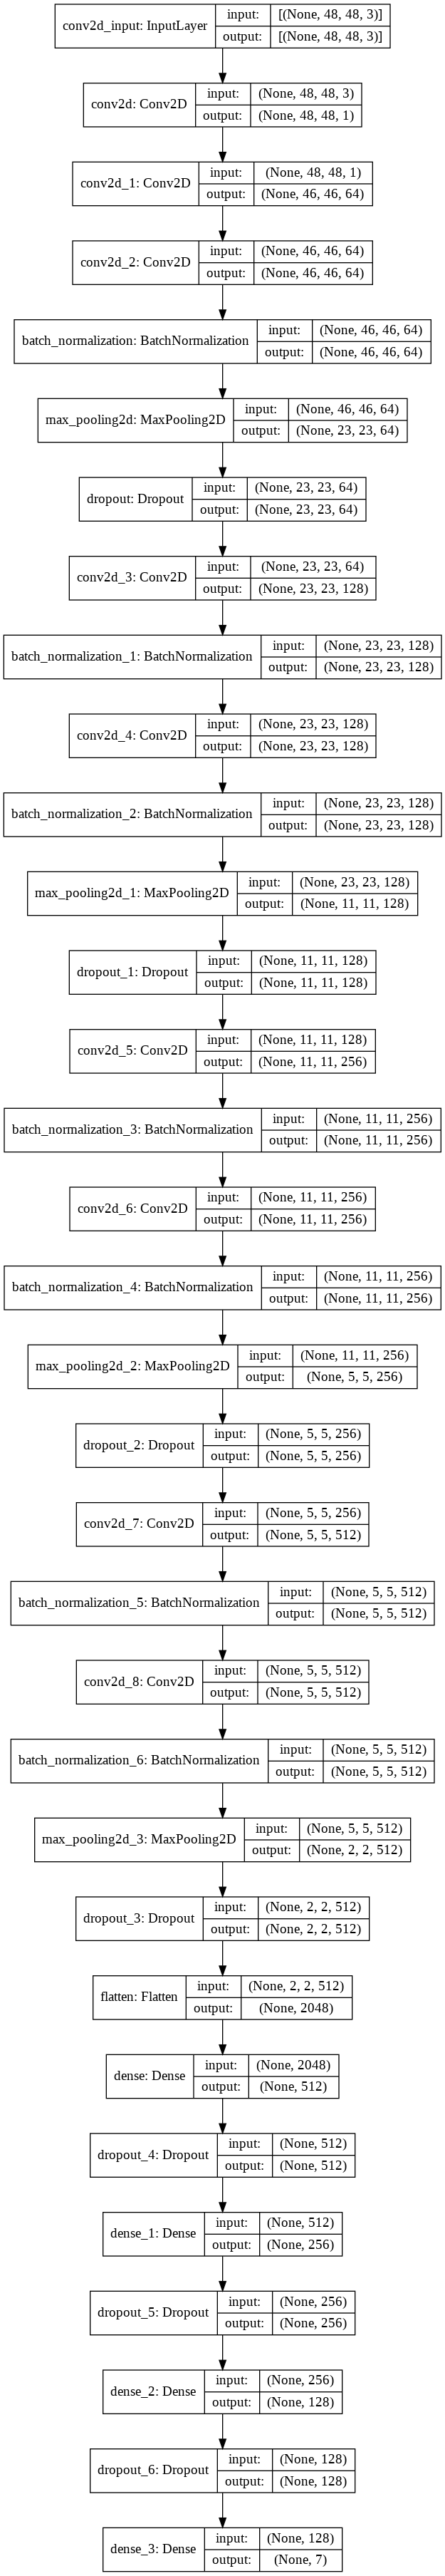

In [ ]:
from keras.utils.vis_utils import plot_model

model1 = Model1()
model1.summary()
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model1.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [ ]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
tensorboard = TensorBoard(log_dir='./logs')
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint("/content/drive/MyDrive/Class_Imbalance/FER2013/Experiment/", monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
model1.fit(X_train,Y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(X_valid, Y_valid),
          shuffle=True,
          callbacks=[lr_reducer, tensorboard, checkpointer])

Epoch 1/100
225/225 [==============================] - 55s 88ms/step - loss: 2.4475 - accuracy: 0.1796 - val_loss: 1.8739 - val_accuracy: 0.2449

Epoch 00001: val_loss improved from inf to 1.87392, saving model to /content/drive/MyDrive/Class_Imbalance/FER2013/Experiment/
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Class_Imbalance/FER2013/Experiment/assets
Epoch 2/100
225/225 [==============================] - 18s 80ms/step - loss: 1.8672 - accuracy: 0.2260 - val_loss: 1.8301 - val_accuracy: 0.2449

Epoch 00002: val_loss improved from 1.87392 to 1.83013, saving model to /content/drive/MyDrive/Class_Imbalance/FER2013/Experiment/
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Class_Imbalance/FER2013/Experiment/assets
Epoch 3/100
225/225 [==============================] - 18s 82ms/step - loss: 1.8438 - accuracy: 0.2388 - val_loss: 1.8320 - val_accuracy: 0.2449

Epoch 00003: val_loss did not improve from 1.83013
Epoch 4/100
225/225 [==============================] 

In [ ]:
# model1.save_weights("/content/drive/MyDrive/Class_Imbalance/FER2013/Experiment/face_expr_model1.h5")
model1.evaluate(X_test, Y_test, batch_size=batch_size)


29/29 [==============================] - 1s 26ms/step - loss: 1.8112 - accuracy: 0.2494


[1.8112475872039795, 0.24937307834625244]

### Partition Code

In [ ]:
import sys
import time 
import os
import cv2
import datetime
from PIL import Image
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
% matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Class_Imbalance/FER2013/icml_face_data.csv')
data_train = data.loc[data[' Usage']=='Training']
public_test = data.loc[data[' Usage']=='PublicTest']
private_test = data.loc[data[' Usage']=='PrivateTest']

In [ ]:
data_train.describe()


,emotion
count,28709.000000
mean,3.317427
std,1.876632
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [ ]:
from sklearn.utils import shuffle
data_train = shuffle(data_train)
public_test = shuffle(public_test)
private_test = shuffle(private_test)

In [ ]:
train = np.array(data_train.iloc[:,2])
validation = np.array(private_test.iloc[:,2])
test = np.array(public_test.iloc[:,2])
print(train.shape, test.shape, validation.shape)

(28709,) (3589,) (3589,)


In [ ]:
train = train.reshape(28709,1)
test = test.reshape(3589,1)
validation = validation.reshape(3589,1)

In [ ]:
def data_augmentation(img):
  img = cv2.flip(img.reshape(48,48), 1)
  return np.array(img.reshape(48,48,1)).astype(np.float32)

In [ ]:
import cv2
X_train_flip = list()

def reform_data(img_str):
  t1 = img_str[0].split()
  t2 = np.array(t1).astype(np.float32)
  t3 = t2.reshape(48, 48)
  t4 = cv2.cvtColor(t3, cv2.COLOR_GRAY2BGR)
  return t4


def reform_data_aug(img_str):
  t1 = img_str[0].split()
  t2 = np.array(t1).astype(np.float32)
  t3 = t2.reshape(48,48)
  t_1 = data_augmentation(t3)
  t4 = cv2.cvtColor(t3, cv2.COLOR_GRAY2BGR)
  X_train_flip.append(cv2.cvtColor(t_1, cv2.COLOR_GRAY2BGR))
  return t4

# X_train_1 = np.apply_along_axis(reform_data_aug, 1, train)
# X_train = np.array(list(X_train_1) + X_train_flip)
X_train = np.apply_along_axis(reform_data, 1, train)
X_test = np.apply_along_axis(reform_data, 1, test)
X_valid = np.apply_along_axis(reform_data, 1, validation)

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(28709, 48, 48, 3)
(3589, 48, 48, 3)
(3589, 48, 48, 3)


In [ ]:
Y_train = data_train['emotion']
Y_test = public_test['emotion']
Y_validation = private_test['emotion']
print(Y_train.shape, Y_test.shape, Y_validation.shape)


(28709,) (3589,) (3589,)


In [ ]:
# Y_train = np.array(list(Y_train) + list(Y_train))
# Y_train.shape

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, Conv3D, MaxPooling2D, BatchNormalization, AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, Adamax
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

In [ ]:
num_features = 64
num_labels = 2
batch_size = 128
epochs = 100
input_shape = (48, 48, 3)

In [ ]:
def Model1(input_shape=(48,48,3), num_labels = 2):
  model = Sequential()
  model.add(Conv2D(1, kernel_size=(1, 1), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=l2(0.01)))
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(2*2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*2*num_features, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(2*num_features, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_labels, activation='softmax'))
  return model

In [ ]:
def model_init(X_train, y_train):

    def onehot(Y, C):
      Y = np.eye(C)[Y]
      return Y
    y_train = onehot(y_train,2)
    num_features = 64
    num_labels = 2
    batch_size = 64
    epochs = 100
    input_shape = (48, 48, 3)

    model1 = Model1()
    # model1.summary()

    # model1.compile(loss=categorical_crossentropy,
    #               optimizer=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
    #               metrics=['accuracy'])

    # model1.fit(X_train,y_train,
    #           batch_size=batch_size,
    #           epochs=5,
    #           verbose=0,
    #           shuffle=True,
    #           # callbacks=[lr_reducer, tensorboard, checkpointer]
    #            )
    return model1, y_train

In [ ]:
import math

def farthestVal(num,numbers):
	largest_delta = 0
	large_key = 0
	for key in numbers:
		if(math.fabs(num-key) > largest_delta):
			largest_delta = math.fabs(num-key)
			large_key = key
	return large_key


def gpartition(numbers):
  final_partitions = []
  left = []
  right = []
  balance = 0 #negative value if left sum is higher, positive value if right sum is higher and 0 if sums are equal
  numbers = list(numbers)
  count = len(numbers)
  for j in range(count):
    if(balance != 0.0):
      if(balance < 0):
        far_val = farthestVal(balance, numbers)
        right.append(far_val)
        numbers.remove(far_val)
        balance += far_val
      else:
        far_val = farthestVal(balance, numbers)
        left.append(far_val)
        numbers.remove(far_val)
        balance -= far_val
    else:
      far_val = farthestVal(balance, numbers)
      left.append(far_val)
      numbers.remove(far_val)
      balance -= far_val

  final_partitions.append(left)
  final_partitions.append(right)
  return final_partitions


In [ ]:
#you need to install some libraries i.e. networkx, numpy, sklearn, netlsd and anytree
#from base import fetch_dataset
# from Gpartition import gpartition
import networkx as nx
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import multiprocessing, copy
from joblib import Parallel, delayed
import copy, math
import string
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import GridSearchCV,StratifiedKFold, RepeatedKFold
import pickle
num_cores = multiprocessing.cpu_count()

#########################
class Classifier_Tree:

    def __init__(self, local_model, labels):

        self.left = None
        self.right = None
        self.local_model = local_model
        self.labels = labels

    def insert(self, local_model):
        self.local_model = local_model

    def left_insert(self, left):
        self.left = left

    def right_insert(self, right):
        self.right = right

    # This is the function that does predictions.
    def predict(self, instance):
        if len( self.labels ) == 1:
            return self.labels

        val = self.local_model.predict(instance)
        if np.argmax(val) == 0:
            return self.left.predict(instance)
        if np.argmax(val) == 1:
            return self.right.predict(instance)

    def PrintTree(self):
        print( self.labels)
        if self.left:
            self.left.PrintTree()

        if self.right:
            self.right.PrintTree()


########################################################################
############ Given a frequency list and list of unique labels, partitions it
############ into two parts of labels that "roughly" equal into frequency size
########################################################################
def partition(Yuf, Yu):
    Yuf_copy = copy.deepcopy(Yuf)

##TODO: We are using greedy partition at the moment.
    res_parts = gpartition(Yuf)

    Yu_parts = []
    for part in res_parts:
        temp = []
        for item in part:
            temp.append( Yu[ Yuf_copy.index(item) ] )
## TODO: There must be a better way to do what I did here. I am just deleting
## a label frequency from consideration to handle the case when two labels have
## have same frequency.  But it works and is efficient too, I believe.
            Yuf_copy[ Yuf_copy.index(item) ] = -99
        Yu_parts.append(temp)
    return Yu_parts

########################################################################
############ This function recursively divides data and labels into two parts
############ and returns a tree of classifiers. X is a dataframe and Y is list
########################################################################
def build_tree_models(X,Y):

    label_map=collections.Counter(Y)
    # Unique labels and their frequencies
    Yu = list(label_map.keys())
    Yuf = list(label_map.values())
    # The following should work even when Yuf is a single value
    # Essentially the code should not do anything in that case.

    # In th following we divide dataset and labels into two parts based on size.
    #TODO: There is a lot of room to play here. For example, we should try
    # more than two parts, e.g., if Y is "roughly" balanced there is no need to
    # partition at all, etc.
    A,B = partition(Yuf, Yu)
    Z = [0 if x in A else 1 for x in Y]
    N_JOBS = num_cores 

    print("Building a Binary Classifier for classes: ", Yu)
    print("........................................................................")

    model, y_train = model_init(X, Z)    
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-7))
    model.fit(X,y_train,
              batch_size=batch_size,
              epochs=100,
              verbose=0,
              shuffle=True
               )

    print("Completed Model for:", Yu)
    print("........................................................................")
    node = Classifier_Tree( model, Yu )
    node.labels = Yu

    # If there is only one label then we have reached a leaf node and this is
    # the final classifier.
    if len(node.labels)==1:
        return node

## # TODO: Inconsistent ways to handle subsets of X and Y because X is dataframe
## # and Y is a list. Should be fixed at some point.
    Z0 = np.where( np.array(Z) == 0)[0]
    Z1 = np.where(np.array(Z) == 1)[0]
    Y0 = [ Y[i] for i in Z0]
    Y1 = [ Y[i] for i in Z1]

    X0  = X[ np.array(Z) == 0 ]
    X1  = X[ np.array(Z) == 1 ]

    node.left_insert( build_tree_models( X0,Y0) )
    node.right_insert( build_tree_models( X1,Y1) )
    return node

###############################################################################
######## This is only method we need to call.
######## A lot needs to be fixed. Test size is fixed at 20%. The predictions
######## take a lot of time and should be parrallelized.  Somehow need to
######## run grid search for the model we need to use. Without that our accuracy
######## would suffer.
###############################################################################
def get_im_accuracy(X_train, y_train, X_test, y_test, r_seed=314, use_saved = False):
    filename = '/content/drive/MyDrive/Class_Imbalance/FER2013/Experiment/tree_model.obj'

    # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=r_seed)


    if use_saved:
        filehandler = open(filename, 'rb')
        rec_model = pickle.load(filehandler)
    else:
        rec_model = build_tree_models(X_train,y_train)
        file_pi = open(filename, 'wb')
        # pickle.dump(rec_model, file_pi)

    count = 0
    print('Models Tree building Complete. ')
    print('Starting Model Testing...')
    # predicted_y = Parallel(n_jobs=1, verbose=2)(delayed(rec_model.predict)
    #                     ([row]) for index, row in X_test.iterrows())
    predicted_y = Parallel(n_jobs=1, verbose=2)(delayed(rec_model.predict)
                        (X_test[i:i+1]) for i in range(0, X_test.shape[0]))
    for i in range( len(y_test) ):
        if [ y_test[i] ] == predicted_y[i] :
            count += 1
    rec_model.PrintTree()
    return (count/len(X_test)), rec_model


In [ ]:
import pandas as pd
m = X_train.shape[0]
m_t = X_test.shape[0]
acc , tree_mod = get_im_accuracy(X_train[:m], list(Y_train[:m]), X_test[:m_t], list(Y_test[:m_t]))

Building a Binary Classifier for classes:  [5, 3, 0, 4, 2, 6, 1]
........................................................................
Completed Model for: [5, 3, 0, 4, 2, 6, 1]
........................................................................
Building a Binary Classifier for classes:  [5, 3, 2, 1]
........................................................................
Completed Model for: [5, 3, 2, 1]
........................................................................
Building a Binary Classifier for classes:  [3, 1]
........................................................................
Completed Model for: [3, 1]
........................................................................
Building a Binary Classifier for classes:  [3]
........................................................................
Completed Model for: [3]
........................................................................
Building a Binary Classifier for classes:  [1]
.....................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[5, 3, 0, 4, 2, 6, 1]
[5, 3, 2, 1]
[3, 1]
[3]
[1]
[5, 2]
[2]
[5]
[0, 4, 6]
[6]
[0, 4]
[4]
[0]


[Parallel(n_jobs=1)]: Done 3589 out of 3589 | elapsed:  6.1min finished


In [ ]:
print('test set accuracy:', acc)

test set accuracy: 0.5051546391752577


In [ ]:
print(tree_mod)